## 1. Author

####     Name :  Mohit yadav
####     Student ID :210491443

## 2. Problem formulation

#### Problem : Identifying the song type i.e audio interpretation(Hum or Whistle) from the dataset.

#### There are multiple interesting things about it for example:
1.Will be able to explore multiple features related to the classification

2.An application of predicting of the Live audio type can be made. 

## 3. Machine Learning pipeline

My machine learning Pipeline contains **Input as mfccs as a feature** and **Output as Audio_type** ie audio interpretation.

1.Divided the data into Train,test,validation

                V
                
2.USing RandomForestClassifier trained the data

                V
                
3.Predicted the Data and assessed using Classification Matrix.

## 4. Transformation stage


Feature -> **Mfccs as a feature is extracted from the Audio (.wav) data.**

In [181]:
def mfccs_feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #Scaled mfccs to its mean
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features 

As I have prior Knoweldge of data, I have explored certain features such as **Specral_centroid,Pitch,beats,tempo,Flatness and Mfccs** and have decided to proceed with Mel-frequency cepstral coefficients (MFCC) with n_mfcc =40.

In [11]:
path = "C:/Users/04moh/OneDrive - Queen Mary, University of London/ML mini project/data/"

In [12]:
import os
#Declared an empty list to store the attributes of data and its Features
data = []

for folder in tqdm(os.listdir(path)):
    for file in os.listdir(path+"/"+folder):
        Label = folder.split('/')[-1].split('_')[0] 
        
        file_name = file.split('/')[-1]
        
        #This is audio file number
        participant_ID = file.split('/')[-1].split('_')[0]   
        
        #This is Audio Interpretation ie the Y Label
        audio_type = file.split('/')[-1].split('_')[1]
        
        #file_path is the actual path of the file
        file_path = path+"/"+folder+"/"+file
        
        #This is Mfccs feature which is our X data
        feature = mfccs_feature_extractor(file_path)
        
        xi = [audio_type,Label,file_name,participant_ID,feature]
       
        data.append(xi)
        
           
       

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [10:57<00:00, 41.08s/it]


## 5. Modelling

**ML Model used here is RandomForestClassifier from sklearn.ensemble**
I have used this model because Random Forests implicitly perform feature selection and generate uncorrelated decision trees. It does this by choosing a random set of features to build each decision tree. This also makes it a great model when we work with a high number of features in the data.

In [172]:
from sklearn.model_selection import train_test_split
#Test data is stored as X_test and Y_test as 20% of the total data
X_data,X_test,y_data,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#Rest of the data is divided into trian and Validation in 80:20 ratio respectively
X_train,X_val,y_train,y_val=train_test_split(X_data,y_data,test_size=0.2,random_state=0)

In [175]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10000)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

## 6. Methodology

**Classification Table**
This performance evaluation metric shows precision,recall f1-score and support of the mfccs features with respect to Label.


In [176]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

         Hum     0.9672    1.0000    0.9833       383
     Whistle     1.0000    0.9110    0.9534       146

    accuracy                         0.9754       529
   macro avg     0.9836    0.9555    0.9684       529
weighted avg     0.9762    0.9754    0.9751       529



**Confusion Matrix clearly shows 
TP = 383,TN = 133,FP = 0, FN = 13**

In [196]:
print(confusion_matrix(y_val,y_pred))

[[383   0]
 [ 13 133]]


**Accuracy score comes out to be 0.9754**

In [194]:
print(accuracy_score(y_val,y_pred))

0.9754253308128544


**Testing our model with the test data, accuracy comes out to be 0.9803** 

In [177]:
y_test_pred = clf.predict(X_test)

In [178]:
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

         Hum     0.9732    1.0000    0.9864       472
     Whistle     1.0000    0.9312    0.9644       189

    accuracy                         0.9803       661
   macro avg     0.9866    0.9656    0.9754       661
weighted avg     0.9809    0.9803    0.9801       661



**A Simple application which takes input as the audio by user and predicts its audio type i.e ("Hum","Whistle") in the form of Image.**

In [179]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def my_application(audio,sample_rate):
    
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    feature = np.mean(mfccs_features.T,axis=0)
    
    X_test = np.array(feature.tolist())
    
    X_test = scaler.transform([X_test])
    
    y_pred = clf.predict(X_test)
    
    
    if y_pred[0] == "Hum":
        img = mpimg.imread('C:/Users/04moh/Pictures/Screenshots/hum.png')
        imgplot = plt.imshow(img)
        image = plt.show(imgplot)
    else:
        img = mpimg.imread('C:/Users/04moh/Pictures/Screenshots/whistle.png')
        imgplot = plt.imshow(img)
        image = plt.show(imgplot)
        
    return image
    

## 7. Dataset

**Combined all the data into a single Dataframe with the Input as mlmp_df["mfccs"] and Output as mlmp_df["audio_type"]**

In [ ]:

import pandas as pd
import numpy as np
import librosa

In [198]:
mlmp_df = pd.DataFrame(data,columns=['audio_type','label','song_file','number','mfccs'])
mlmp_df.head()

,audio_type,label,song_file,number,mfccs
0,hum,Frozen,S100_hum_2_Frozen.wav,S100,"[-433.10962, 119.792656, -40.30654, 42.975502,..."
1,hum,Frozen,S100_hum_4_Frozen.wav,S100,"[-446.6019, 110.20216, -42.162487, 41.418453, ..."
2,hum,Frozen,S101_hum_2_Frozen.wav,S101,"[-533.01135, 92.67512, -50.012924, 4.7327213, ..."
3,hum,Frozen,S101_hum_4_Frozen.wav,S101,"[-611.63477, 71.22068, -22.783203, 24.81314, 3..."
4,hum,Frozen,S102_hum_2_Frozen.wav,S102,"[-412.55457, 131.74039, 34.080112, 41.141907, ..."


**Cleaning the Data and removing outliers from the audio_type which are misLabelled**

In [199]:
print(mlmp_df['audio_type'].unique())

['hum' 'whistle' 'Hum' 'Hun' 'Whistle' 'Hum3' 'Hum4' 'Frozen' 'whisle'
 'Hum 2 Frozen.wav' 'Whistle 2 Frozen.wav' 'wistle' 'Hum1' 'hakunamatata'
 'Hum 2 Hakuna.wav' 'Whistle 2 Hakuna.wav' 'Hum2' 'mamia'
 'Hum 1 Mamma.wav' 'Whistle 1 Mamma.wav' 'pinkpanther' 'Hum 2 Panther.wav'
 'Whistle 1 Panther.wav' 'hum2' 'harrypotter' 'Hum 2 Potter.wav'
 'Whistle 2 Potter.wav' 'singingintherain' 'Hum 1 Rain.wav'
 'Whistle 2 Rain.wav' 'whislte' 'ham' 'thisisme' 'Hum 1 Showman.wav'
 'Whistle 2 Showman.wav' 'Hum3.StarWar.wav' 'starwars'
 'Hum 1 StarWars.wav' 'Whistle 1 StarWars.wav']


In [200]:
hum = "hum|Hun|Hum3|Hum4|Hum 2 Frozen.wav|Hum2|Hum 2 Hakuna.wav|Hum1|Hum 1 Mamma.wav|Hum 2 Potter.wav|Hum 2 Panther.wav|Hum 1 Rain.wav|ham|Hum 1 StarWars.wav|Hum.StarWar.wav|Hum 1 Showman.wav"
whistle = "whistle|whisle|wistle|whislte"
mlmp_df['audio_type'] = mlmp_df.audio_type.str.replace(hum, 'Hum')
mlmp_df['audio_type'] = mlmp_df.audio_type.str.replace(whistle, 'Whistle')

<ipython-input-200-0c8416047210>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  mlmp_df['audio_type'] = mlmp_df.audio_type.str.replace(hum, 'Hum')
<ipython-input-200-0c8416047210>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  mlmp_df['audio_type'] = mlmp_df.audio_type.str.replace(whistle, 'Whistle')


In [201]:
mlmp_df = mlmp_df.drop(mlmp_df[(mlmp_df.audio_type != 'Hum') & (mlmp_df.audio_type != 'Whistle')].index)

**Preparing the Input and Output data for modelling stage**

In [202]:
X = np.array(mlmp_df['mfccs'].tolist())
y = np.array(mlmp_df["audio_type"].tolist())
X.shape

(3303, 40)

In [203]:
y.shape

(3303,)

**Scaling down the features using Min Max Scaler**

In [205]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fitting = scaler.fit(X,y)
X = scaler.transform(X)

**Visualising the data with the audio_type as Label**

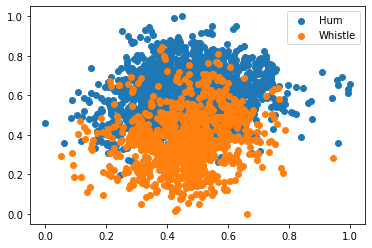

In [206]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
counter = Counter(y)
for label, _ in counter.items():
    row_ix = where(y == label)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## 8. Results

In [209]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav

fs=44100
duration = 5  # seconds
myrecording = sd.rec(duration * fs, samplerate=fs,channels = 1,dtype='float64')
print("Recording Audio")
sd.wait()
print("Audio recording complete , Play Audio")
sd.play(myrecording, fs)
sd.wait()
print("Play Audio Complete")
audio = myrecording[:,-1]


Recording Audio
Audio recording complete , Play Audio
Play Audio Complete


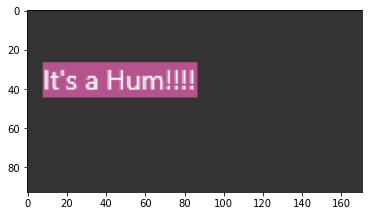

In [210]:
my_application(audio,fs)

### The program accurately predicts the audio input and prints out the Interpretation Type

## 9. Conclusions

**Couple of Improvements can be made**
**.     1.  If its the mixture of hum and whistle as the input the program gives different output**
**.     2.  Could have classified even the song label i.e.(Harry,starwars etc) with more data availability**
